In [15]:
# -*- cding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.
import pandas as pd

#matplotlib을 사용하요 그래프로 표현하기
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('./deeplearning/dataset/pima-indians-diabetes.csv',
                names = ["pregnant", "plasma", "pressure", "thickness",
                         "insulin", "BMI", "prdigree", "age", "class"])

In [17]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  prdigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   prdigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [19]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         prdigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [20]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [21]:
# 임신 횟수와 당뇨병 발병 확률 계산
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [24]:
# 그래프 크기 지정
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

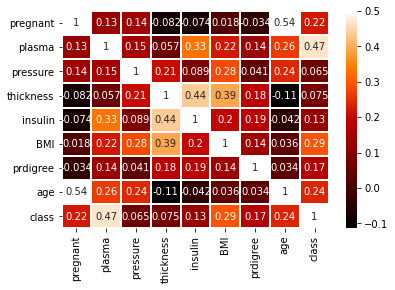

In [25]:
# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

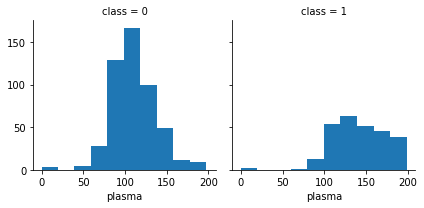

In [26]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [27]:
# 피마 인디언의 당노병 예측해보자
# 은닉층을 하나더 만들어서
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import numpy
import tensorflow as tf

# 
numpy.random.seed(3)
tf.random.set_seed(3)

dataset = numpy.loadtxt("./deeplearning/dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]


model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.fit(X, Y, epochs=200, batch_size=10)


print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 866us/sample - loss: 11.4155 - accuracy: 0.6198
Epoch 2/200
768/768 [==============================] - 0s 112us/sample - loss: 6.4242 - accuracy: 0.6159
Epoch 3/200
768/768 [==============================] - 0s 110us/sample - loss: 3.6949 - accuracy: 0.5221
Epoch 4/200
768/768 [==============================] - 0s 110us/sample - loss: 2.2150 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 116us/sample - loss: 1.3725 - accuracy: 0.5182
Epoch 6/200
768/768 [==============================] - 0s 114us/sample - loss: 0.9083 - accuracy: 0.5586
Epoch 7/200
768/768 [==============================] - 0s 116us/sample - loss: 0.7783 - accuracy: 0.5547
Epoch 8/200
768/768 [==============================] - 0s 117us/sample - loss: 0.7476 - accuracy: 0.6172
Epoch 9/200
768/768 [==============================] - 0s 123us/sample - loss: 0.7330 - accuracy: 0.6615
Epoch 10/200
768/768 [===========

768/768 [==============================] - 0s 118us/sample - loss: 0.5329 - accuracy: 0.7135
Epoch 79/200
768/768 [==============================] - 0s 158us/sample - loss: 0.5319 - accuracy: 0.7148
Epoch 80/200
768/768 [==============================] - 0s 161us/sample - loss: 0.5388 - accuracy: 0.7109
Epoch 81/200
768/768 [==============================] - 0s 175us/sample - loss: 0.5295 - accuracy: 0.7148
Epoch 82/200
768/768 [==============================] - 0s 169us/sample - loss: 0.5244 - accuracy: 0.7201
Epoch 83/200
768/768 [==============================] - 0s 151us/sample - loss: 0.5314 - accuracy: 0.7096
Epoch 84/200
768/768 [==============================] - 0s 163us/sample - loss: 0.5288 - accuracy: 0.7253
Epoch 85/200
768/768 [==============================] - 0s 152us/sample - loss: 0.5330 - accuracy: 0.7148
Epoch 86/200
768/768 [==============================] - 0s 147us/sample - loss: 0.5315 - accuracy: 0.7109
Epoch 87/200
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 114us/sample - loss: 0.5053 - accuracy: 0.7214
Epoch 155/200
768/768 [==============================] - 0s 116us/sample - loss: 0.5055 - accuracy: 0.7266
Epoch 156/200
768/768 [==============================] - 0s 113us/sample - loss: 0.5043 - accuracy: 0.7174
Epoch 157/200
768/768 [==============================] - 0s 110us/sample - loss: 0.5131 - accuracy: 0.7266
Epoch 158/200
768/768 [==============================] - 0s 110us/sample - loss: 0.5087 - accuracy: 0.7188
Epoch 159/200
768/768 [==============================] - 0s 110us/sample - loss: 0.5171 - accuracy: 0.7253
Epoch 160/200
768/768 [==============================] - 0s 112us/sample - loss: 0.5172 - accuracy: 0.7174
Epoch 161/200
768/768 [==============================] - 0s 112us/sample - loss: 0.5059 - accuracy: 0.7279
Epoch 162/200
768/768 [==============================] - 0s 113us/sample - loss: 0.5094 - accuracy: 0.7214
Epoch 163/200
768/768 [============================


 Accuracy: 0.7253
